In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df = pd.read_csv("concat_df_terrorism.csv")
pd.set_option('display.max_columns', None)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_1588\1886519131.py:1: DtypeWarning: Columns (56,74,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("concat_df_terrorism.csv")


In [139]:
df.sample(2)

,iyear,imonth,iday,approxdate,extended,resolution,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5844,2021,5,3,NaN,0,NaN,Benue,Ukuse,7.280996,8.345466,1.0,0,NaN,05/03/2021: Assailants opened fire on resident...,1,1,1,0,NaN,NaN,1.0,1,0,2,Armed Assault,7.0,Facility/Infrastructure Attack,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Residences,147.0,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fulani extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,8.0,Incendiary,18.0,Arson/Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,8.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,Houses damaged,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casualty numbers conflict across sources. Foll...,"""Herdsmen sack Benue communities, kill 17 farm...","""Suspected herdsmen kill 19 people in Benue,"" ...","""17 killed as gunmen set houses on fire in Ben...",START Primary Collection,-9,-9,0,-9,"202105020028, 202105020029, 202105030029, 2021..."
5768,2021,4,14,NaN,1,NaN,Benue,Gom,7.621510,8.136890,1.0,0,The incident occurred in Gwer West district.,04/14/2021: Assailants attacked civilians at a...,1,1,1,0,NaN,NaN,1.0,1,0,6,Hostage Taking (Kidnapping),2.0,Armed Assault,NaN,NaN,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Not Applicable,Civilians,147.0,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fulani extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0,0.0,NaN,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,-99.0,0.0,NaN,-99.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.0,Combination,1.0,NaN,"""Suspected herdsmen reportedly kill 6 mourners...",NaN,NaN,START Primary Collection,-9,-9,0,-9,"202104140001, 202104140040, 202104160005"


In [140]:
df.rename(columns={"iyear":"year","imonth":"month","iday":"day"},inplace=True)

In [141]:
df.columns

Index(['year', 'month', 'day', 'approxdate', 'extended', 'resolution',
       'provstate', 'city', 'latitude', 'longitude',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=130)

In [142]:
df.shape

(5998, 130)

In [143]:
df.isnull().sum()

year             0
month            0
day              0
approxdate    5684
extended         0
              ... 
INT_LOG          0
INT_IDEO         0
INT_MISC         0
INT_ANY          0
related       3977
Length: 130, dtype: int64

In [144]:
df.isnull().mean() * 100

year           0.000000
month          0.000000
day            0.000000
approxdate    94.764922
extended       0.000000
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       66.305435
Length: 130, dtype: float64

In [145]:
# Get the counts of null values for all columns
null_counts = df.isnull().sum()

# Loop through columns and print null counts
for cols,count in null_counts.items():
    percentage = (count/len(df))*100
    print(f"{cols} :{count}:{percentage:.1f})")

year :0:0.0)
month :0:0.0)
day :0:0.0)
approxdate :5684:94.8)
extended :0:0.0)
resolution :5768:96.2)
provstate :0:0.0)
city :0:0.0)
latitude :48:0.8)
longitude :48:0.8)
specificity :0:0.0)
vicinity :0:0.0)
location :3202:53.4)
summary :60:1.0)
crit1 :0:0.0)
crit2 :0:0.0)
crit3 :0:0.0)
doubtterr :0:0.0)
alternative :5270:87.9)
alternative_txt :5270:87.9)
multiple :0:0.0)
success :0:0.0)
suicide :0:0.0)
attacktype1 :0:0.0)
attacktype1_txt :0:0.0)
attacktype2 :4485:74.8)
attacktype2_txt :4485:74.8)
attacktype3 :5843:97.4)
attacktype3_txt :5843:97.4)
targtype1 :0:0.0)
targtype1_txt :0:0.0)
targsubtype1 :167:2.8)
targsubtype1_txt :167:2.8)
corp1 :170:2.8)
target1 :5:0.1)
natlty1 :10:0.2)
natlty1_txt :10:0.2)
targtype2 :5377:89.6)
targtype2_txt :5377:89.6)
targsubtype2 :5390:89.9)
targsubtype2_txt :5390:89.9)
corp2 :5405:90.1)
target2 :5379:89.7)
natlty2 :5387:89.8)
natlty2_txt :5387:89.8)
targtype3 :5896:98.3)
targtype3_txt :5896:98.3)
targsubtype3 :5899:98.3)
targsubtype3_txt :5899:98.3)


## Removing the columns that have missing values greater than 50%

#### 75 columns are removed
#### (5998, 55) are left for our Analysis

In [146]:
missing_percentage  = df.isnull().mean() *100
columns_to_remove = missing_percentage[missing_percentage > 50].index
df = df.drop(columns=columns_to_remove)
df.head(2)

,year,month,day,extended,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propcomment,ishostkid,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1976,2,13,0,Lagos,Lagos,6.452331,3.419044,1.0,0,02/13/1976: Assailants attacked General Murtal...,1,1,1,0,0.0,1,0,1,Assassination,2,Government (General),17.0,Head of State,Government of Nigeria,4th Head of State: General Murtala Ramat Mohammed,147.0,Nigeria,Coup plotters,0.0,0,-99.0,-99.0,0.0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,3.0,0.0,0.0,1.0,0.0,0.0,0,NaN,0.0,"Segun Akande, ""42 years ago, one of Nigeria's ...","""Anniversary: Motoring Error that Led to the K...",NaN,UMD Miscellaneous,-9,-9,0,-9
1,1980,1,17,0,Kaduna,Kaduna,10.530204,7.437338,1.0,0,NaN,1,1,1,0,0.0,1,0,9,Unknown,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,Consulate,216.0,Great Britain,Zimbabwe Patriotic Front,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1.0,NaN,NaN,NaN,PGIS,1,1,1,1


In [147]:
df.shape

(5998, 55)

# How many Suicide attacks happened

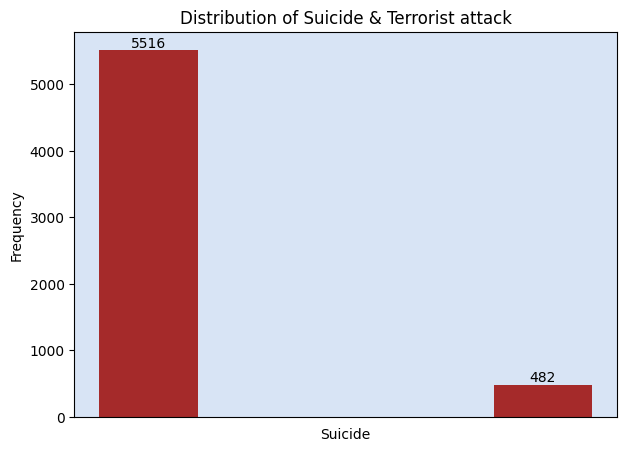

In [148]:
plt.figure(figsize=(7,5)) # Set the figure size
# Count the occurrences of each value

value_counts = df['suicide'].value_counts()
# Create a bar plot


plt.bar(x=value_counts.index, height=value_counts.values,width=0.25,color='brown')
# Add labels and title
plt.xlabel('Suicide')
plt.ylabel('Frequency')
plt.title('Distribution of Suicide & Terrorist attack')

# Display the counts on top of the bars
for i ,count in enumerate(value_counts.values):
    plt.text(i,count,str(count),ha='center',va='bottom')

# Add a nice background color to the plot
plt.gca().set_facecolor('#D8E4F5')
# Remove x-axis numbers
plt.xticks([])
# Display the plot
plt.show()

## **Attack With Respect to Year**
#### Since around 2010, the number of attacks has been increasing rapidly, with the highest rate recorded in 2014

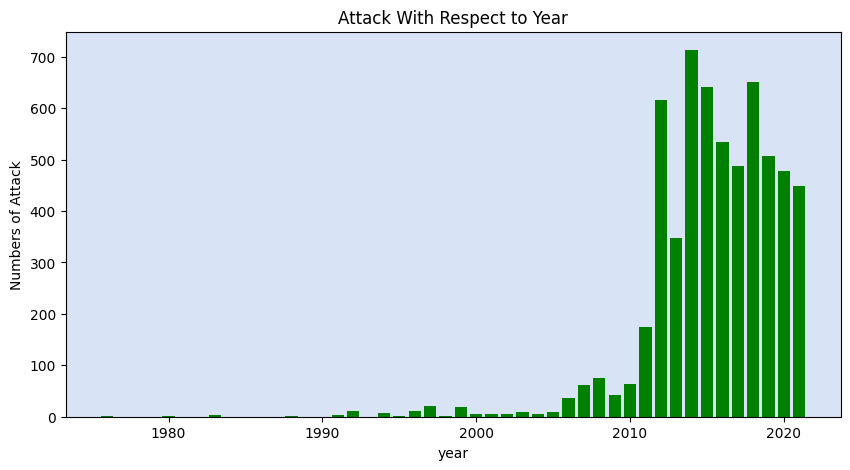

In [149]:
plt.figure(figsize=(10,5)) # Set the figure size
# Count the number of suicide attacks in each year
year_counts = df['year'].value_counts()
plt.xlabel("year")
plt.ylabel("Numbers of Attack")
plt.title("Attack With Respect to Year")
# Create a bar plot
plt.bar(x=year_counts.index, height=year_counts.values,color ='green',width=0.8)
plt.gca().set_facecolor('#D8E4F5')
plt.show()

## **Attack ratio in Months**

In [150]:
attack_counts = df['suicide'].value_counts()
attack_counts

0    5516
1     482
Name: suicide, dtype: int64

In [151]:
# The size() method is called on the grouped data to get the count of occurrences for each group
# The unstack() method is called to reshape the grouped data from a hierarchical index to a tabular form, with 'suicide' values as columns and 'month' values as rows
group_data = df.groupby(['month','suicide']).size().unstack()
print(group_data)

suicide    0   1
month           
1        574  45
2        498  36
3        569  37
4        538  38
5        561  37
6        494  51
7        450  56
8        344  28
9        381  15
10       348  42
11       400  47
12       359  50


<Figure size 1500x500 with 0 Axes>

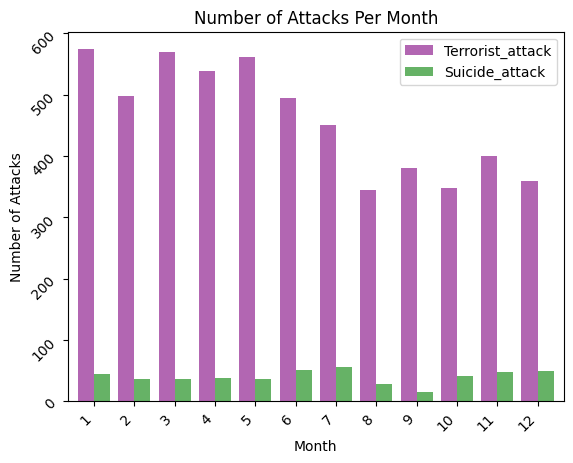

In [152]:
plt.figure(figsize=(15,5))
group_data.plot(kind='bar',color=["purple","green"],alpha=0.6,width = 0.8)

plt.ylabel("Numbers of Attacks")
# Set the title and labels
plt.title("Number of Attacks Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Attacks")
# Customize the ticks and tick labels
plt.xticks(rotation=45,ha="right")
plt.yticks(rotation=45,ha="right")
# Add a legend
plt.legend(["Terrorist_attack","Suicide_attack"])
plt.show()

In [153]:
df.head(1)

,year,month,day,extended,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propcomment,ishostkid,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1976,2,13,0,Lagos,Lagos,6.452331,3.419044,1.0,0,02/13/1976: Assailants attacked General Murtal...,1,1,1,0,0.0,1,0,1,Assassination,2,Government (General),17.0,Head of State,Government of Nigeria,4th Head of State: General Murtala Ramat Mohammed,147.0,Nigeria,Coup plotters,0.0,0,-99.0,-99.0,0.0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,3.0,0.0,0.0,1.0,0.0,0.0,0,NaN,0.0,"Segun Akande, ""42 years ago, one of Nigeria's ...","""Anniversary: Motoring Error that Led to the K...",NaN,UMD Miscellaneous,-9,-9,0,-9


## **Attack Types**

### Top Attack Type: Armed Assault (2821 attacks)
### Least Common Attack Type: Unarmed (12 attacks)

In [154]:
attacktype=df['attacktype1_txt'].value_counts()
print(attacktype)

Armed Assault                          2821
Bombing/Explosion                      1337
Hostage Taking (Kidnapping)             831
Facility/Infrastructure Attack          365
Assassination                           317
Unknown                                 271
Hostage Taking (Barricade Incident)      29
Hijacking                                15
Unarmed Assault                          12
Name: attacktype1_txt, dtype: int64


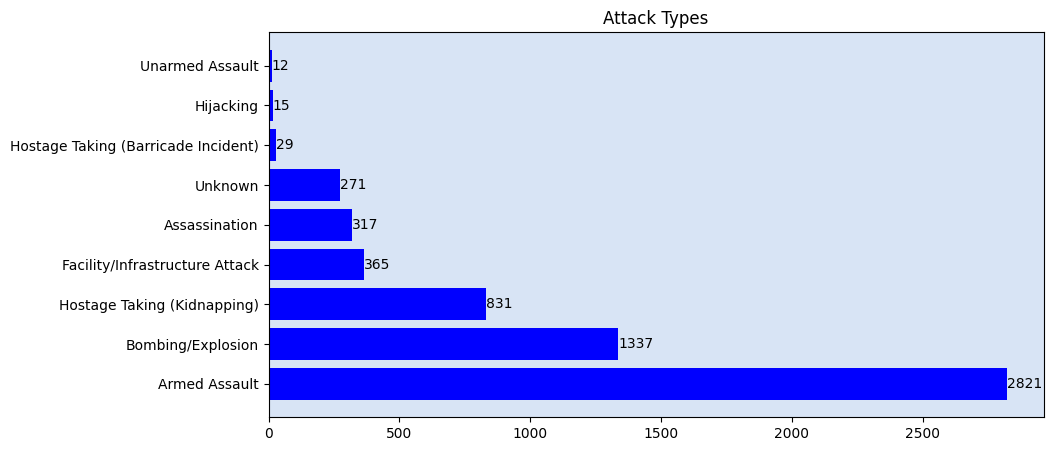

In [155]:
plt.figure(figsize=(10,5))
plt.barh(y=attacktype.index, width=attacktype.values,color='blue')
plt.gca().set_facecolor('#D8E4F5')
# Display the values on the bars
for i,count in enumerate(attacktype.values):
    plt.text(count,i,str(count),ha="left",va="center")
plt.title("Attack Types")
plt.show()

In [156]:
df['city'].nunique()

2615

## **Top 15 Cities with Highest Attack Ratio**

In [157]:
# Assuming your dataset is stored in a DataFrame called 'df'
grouped_data = df.groupby('city').size().reset_index(name='total_attacks')
# Sort the cities based on the total attack  in descending order
sorted_data = grouped_data.sort_values('total_attacks', ascending=False)
# Get the top 15 cities with the highest attack ratio
top_15_cities = sorted_data.head(15)

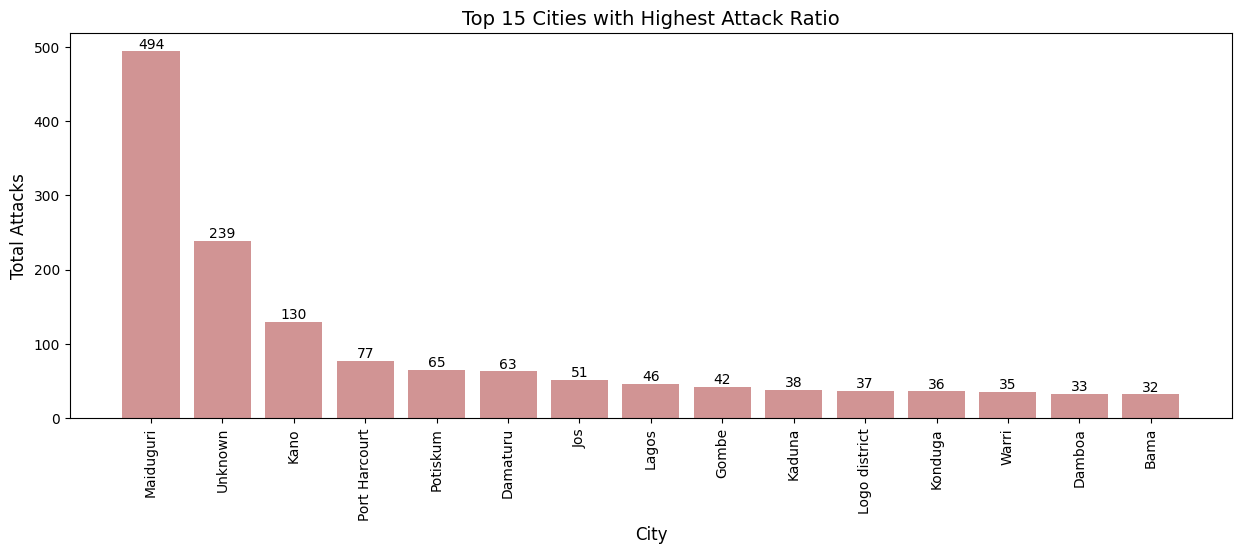

In [158]:
plt.figure(figsize=(15,5))
plt.bar(x=top_15_cities['city'],height=top_15_cities['total_attacks'],color='brown',alpha=0.5)

for i ,count  in enumerate(top_15_cities['total_attacks']):
    plt.text(i,count,str(count),ha='center',va='bottom')
plt.xticks(rotation=90)
plt.xlabel("City", fontsize=12)
plt.ylabel('Total Attacks', fontsize=12)
plt.title('Top 15 Cities with Highest Attack Ratio', fontsize=14)
plt.show()

## **Total Attacks by Day of the Week**

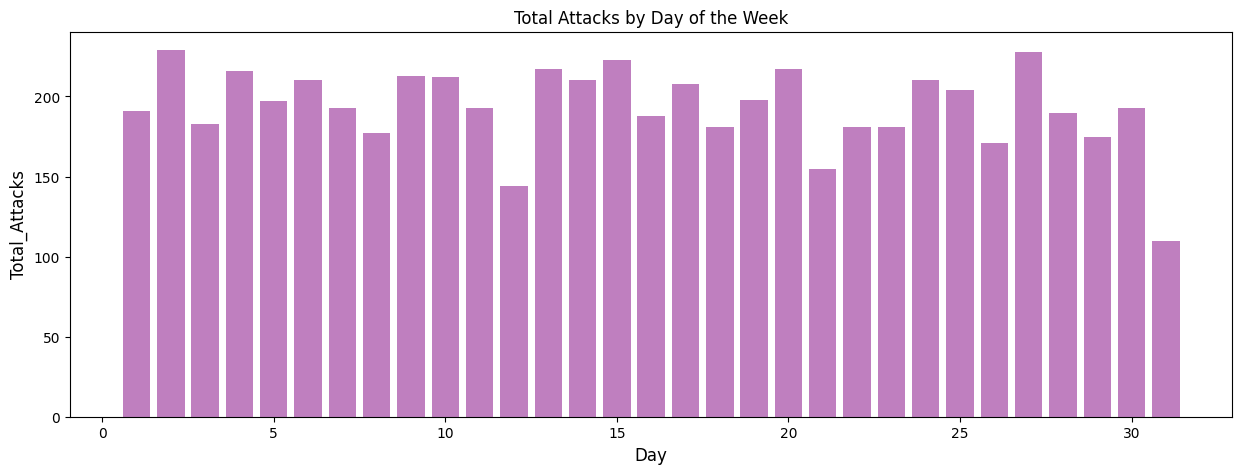

In [159]:
attack_in_days = df.groupby('day').size().reset_index(name='Total_Attacks_in_day')
# sort the day based on attacks 
sorted_days = attack_in_days.sort_values('Total_Attacks_in_day',ascending =False)
plt.figure(figsize=(15,5))
plt.bar(x=sorted_days['day'],height=sorted_days['Total_Attacks_in_day'],color='purple',alpha=0.5)
plt.title("Total Attacks by Day of the Week",fontsize=12)
plt.xlabel("Day",fontsize=12)
plt.ylabel("Total_Attacks",fontsize=12)
plt.show()

In [160]:
df.head(1)

,year,month,day,extended,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propcomment,ishostkid,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1976,2,13,0,Lagos,Lagos,6.452331,3.419044,1.0,0,02/13/1976: Assailants attacked General Murtal...,1,1,1,0,0.0,1,0,1,Assassination,2,Government (General),17.0,Head of State,Government of Nigeria,4th Head of State: General Murtala Ramat Mohammed,147.0,Nigeria,Coup plotters,0.0,0,-99.0,-99.0,0.0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,3.0,0.0,0.0,1.0,0.0,0.0,0,NaN,0.0,"Segun Akande, ""42 years ago, one of Nigeria's ...","""Anniversary: Motoring Error that Led to the K...",NaN,UMD Miscellaneous,-9,-9,0,-9


## **Analysis of Targeted Attack Points**
#### Private Citizens & Property is the top targeted area with lower security, making it easier for terrorists to achieve their objectives. There have been 2914 attacks in this category
#### Airports & Aircraft have been targeted only twice due to their high level of security.

In [161]:
df['targtype1_txt'].unique()

array(['Government (General)', 'Government (Diplomatic)',
       'Educational Institution', 'Journalists & Media',
       'Private Citizens & Property', 'Police',
       'Religious Figures/Institutions', 'Business', 'Maritime',
       'Military', 'Unknown', 'Transportation', 'Utilities',
       'Violent Political Party', 'Airports & Aircraft',
       'Telecommunication', 'NGO', 'Other',
       'Terrorists/Non-State Militia'], dtype=object)

In [162]:
value_target = df['targtype1_txt'].value_counts()

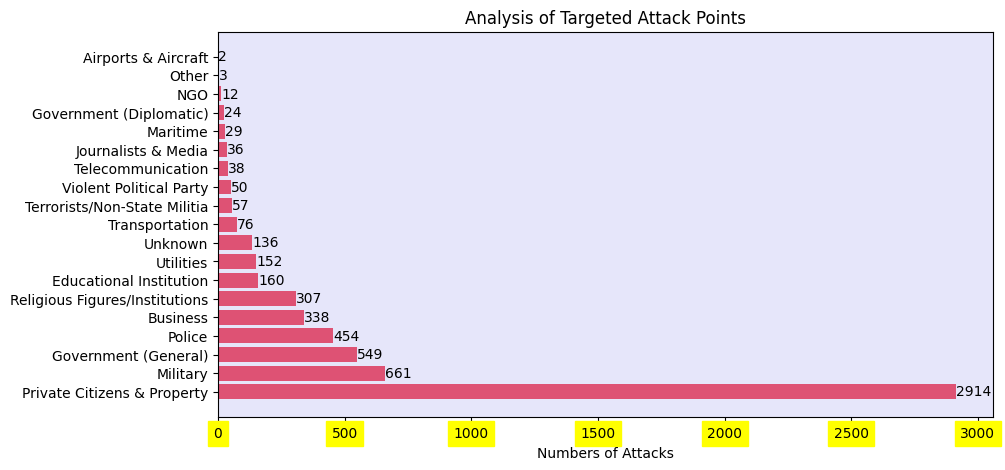

In [163]:
plt.figure(figsize=(10,5))
plt.barh(y= value_target.index,width = value_target.values,color='Crimson',alpha =0.7)



for i ,count in enumerate(value_target):
    plt.text(count,i,str(count),ha="left",va="center")
# Set the background color and text color of labels
for label in plt.gca().get_xticklabels():
    label.set_backgroundcolor("yellow")
    label.set_color("black")
plt.xlabel("Numbers of Attacks")
plt.title("Analysis of Targeted Attack Points")
plt.gca().set_facecolor('#E6E6FA')
# Display the graph
plt.show()

## **Weapons Types Used in Attacks**
#### Firearms are the most commonly used weapons in attacks, with 3449 targets affected
#### Chemical weapons are less frequently used in attacks, with only three recorded incidents

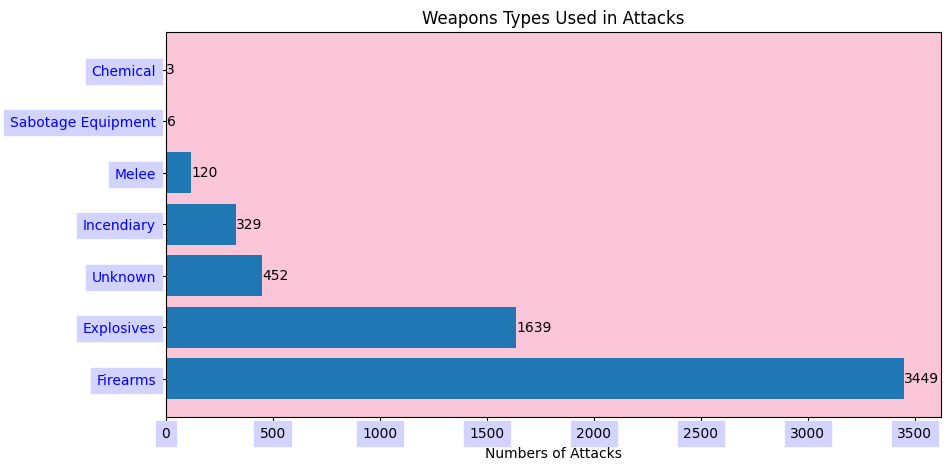

In [171]:
df['weaptype1_txt'].unique()
plt.figure(figsize=(10,5))
plt.barh(y=weap_counts.index,width=weap_counts.values)

for i,count in enumerate(weap_counts):
    plt.text(count,i,str(count),ha="left",va="center")
## set the background colors of x_axis   
for label in plt.gca().get_xticklabels():
    label.set_backgroundcolor("#D3D3FF")
    label.set_color("black")
## set the background colors of y_axis
for label in plt.gca().get_yticklabels():
    label.set_backgroundcolor("#D3D3FF")
    label.set_color("blue")
plt.xlabel("Numbers of Attacks")
plt.title("Weapons Types Used in Attacks")
plt.gca().set_facecolor('#FCC6D9')
# Display the graph
plt.show()

In [183]:
df.sample(1)

,year,month,day,extended,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propcomment,ishostkid,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
1843,2014,6,5,0,Adamawa,Madagali,10.890928,13.627589,1.0,0,06/05/2014: Assailants set fire to the Develop...,1,1,1,0,1.0,1,0,7,Facility/Infrastructure Attack,2,Government (General),21.0,Government Building/Facility/Office,Madagali Development Area Secretariat,Building,147.0,Nigeria,Boko Haram,1.0,0,-99.0,0.0,0.0,8,Incendiary,18.0,Arson/Fire,0.0,0.0,0.0,0.0,0.0,0.0,1,The Madagali Development Area Secretariat buil...,0.0,"""Suspected Boko Haram attack on military, ...","""Soldier, One Other killed by Gunmen in Adamaw...","""Hundreds Killed in Nigeria Militant Attack,"" ...",START Primary Collection,0,0,0,0


## Descriptive Statistics

In [189]:
kill_stat = df['nkill'].describe()
wound_stat = df['nwound'].describe()

In [197]:
data = df.groupby(['nkill','nwound']).size().unstack()
# group_data = df.groupby(['month','suicide']).size().unstack()
print(data.head())

nwound   0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0    \
nkill                                                                           
0.0     1095.0  122.0   51.0   23.0   19.0   10.0    6.0    5.0    5.0    3.0   
1.0      607.0   93.0   51.0   33.0   28.0   12.0    6.0    4.0    3.0    3.0   
2.0      340.0   61.0   32.0   30.0   18.0   14.0    7.0    6.0    4.0    5.0   
3.0      194.0   30.0   30.0   21.0   12.0   14.0    4.0    9.0    2.0    3.0   
4.0      131.0   18.0   19.0   10.0    4.0   11.0    7.0    5.0    8.0    4.0   

nwound  10.0   11.0   12.0   13.0   14.0   15.0   16.0   17.0   18.0   19.0   \
nkill                                                                          
0.0       2.0    2.0    2.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1.0       3.0    2.0    NaN    2.0    1.0    1.0    1.0    2.0    NaN    1.0   
2.0       4.0    1.0    2.0    2.0    NaN    3.0    1.0    1.0    1.0    1.0   
3.0       1.0    3.0    2.0    1

In [184]:
df['nkill'].sum()

30586.0

In [185]:
df['nwound'].sum()

13084.0

2615


Text(0.5, 1.0, 'Geographical Distribution of df Points')

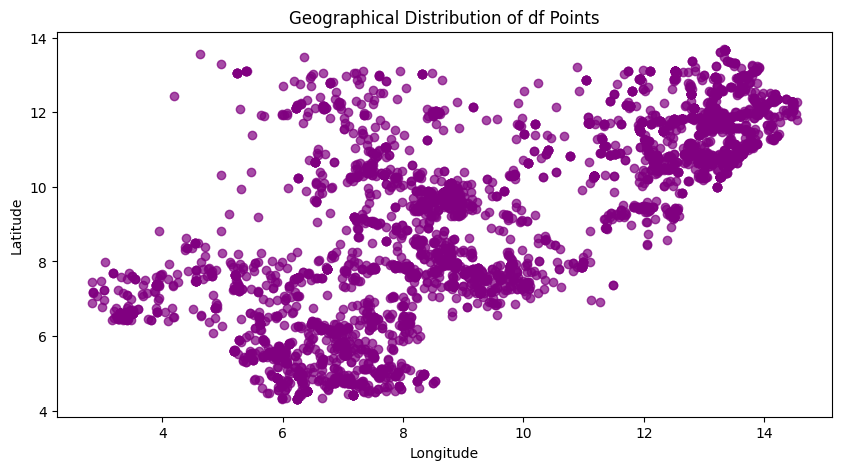

In [166]:
print(df['city'].nunique())
plt.figure(figsize=(10,5))
# Scatter plot of latitude and longitude
plt.scatter(df['longitude'], df['latitude'],c= 'purple',alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of df Points')

In [167]:
print(df['extended'].unique())   ## what is extended [0,1]
print(df['provstate'].unique())

[0 1]
['Lagos' 'Kaduna' 'Unknown' 'Katsina' 'Zamfara' 'Kano' 'Akwa Ibom' 'Edo'
 'Taraba' 'Ondo' 'Bayelsa' 'Cross River' 'Abuja' 'Oyo' 'Anambra' 'Rivers'
 'Osun' 'Ekiti' 'Delta' 'Enugu' 'Ogun' 'Plateau' 'Kwara' 'Imo' 'Kogi'
 'Borno' 'Bauchi' 'Sokoto' 'Abia' 'Benue' 'Ebonyi' 'Adamawa' 'Gombe'
 'Niger' 'Kebbi' 'Yobe' 'Jigawa' 'Nasarawa']


In [168]:
print(df['city'].nunique())

2615
